In [23]:
from Undistorter import Undistorter
undistorter = Undistorter()
print("Distortion Initiation Success")

from Thresholder import Thresholder
thresholder = Thresholder()
print("Thresholding Initiation Success")

from PerspectiveTransformer import PerspectiveTransformer
ptransformer = PerspectiveTransformer()
print("Perspective Transformer Initiation Success")

from LaneDetector import LaneDetector
laneDetector = LaneDetector()
print("Lane Detector Initiation Success") 

from LanePlotter import LanePlotter
lanePlotter = LanePlotter()
print("Lane Plotter Initiation Success") 

Distortion Initiation Success
Thresholding Initiation Success
Perspective Transformer Initiation Success
Lane Detector Initiation Success
Lane Plotter Initiation Success


In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

720


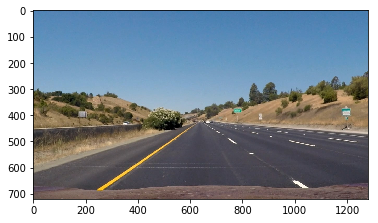

In [38]:
image = mpimg.imread('../test_images/straight_lines1.jpg',cv2.IMREAD_UNCHANGED)
print(image.shape[0])
#img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img = image
plt.imshow(img)
plt.show()

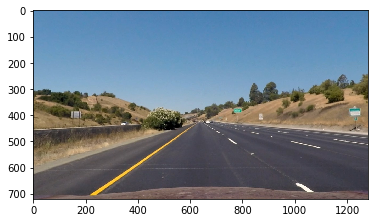

In [39]:
dist_img = undistorter.undistort(img)
plt.imshow(dist_img)
plt.show()

mpimg.imsave('./report_images/distort_correct_img.png',dist_img)

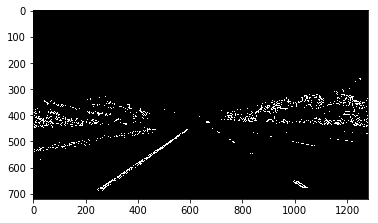

True

In [40]:
thresh_img = thresholder.threshold(img)
plt.imshow(thresh_img,cmap='gray')
plt.show()
cv2.imwrite('./report_images/thresholded_img.png',thresh_img*255)

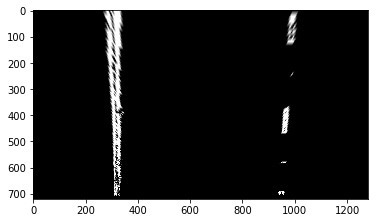

True

In [42]:
warp_img = ptransformer.warp(thresh_img)
plt.imshow(warp_img,cmap='gray')
plt.show()
cv2.imwrite('./report_images/perspective_corrected.png', warp_img*255)

In [43]:
left_fit,right_fit = laneDetector.detect(warp_img)

In [8]:
left_curverad,righr_curverad = laneDetector.get_curvature(warp_img)

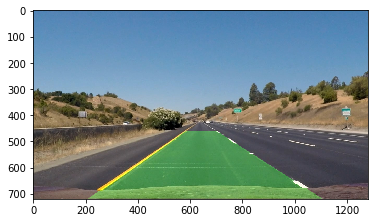

In [9]:
final_img = lanePlotter.plotPolygon(img,left_fit,right_fit,ptransformer.Minv)
plt.imshow(final_img)
plt.show()

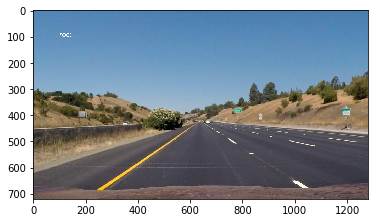

In [10]:
text_img = lanePlotter.textOverLay(img,"roc:",pos=(100,100))
plt.imshow(text_img)
plt.show()

In [11]:
a=1222.3453
t = str(round(a,3))
print(t)

1222.345


In [12]:
from LaneTracker import LaneTracker
laneTracker = LaneTracker()

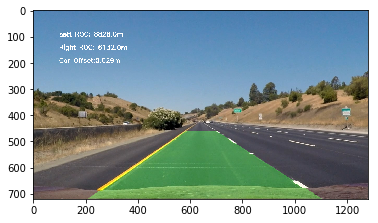

In [13]:
proc_img = laneTracker.process(img)
plt.imshow(proc_img)
plt.show()

In [14]:
from moviepy.editor import VideoFileClip
def process_movie(input_path, output_path):
    clip = VideoFileClip(input_path)
    out_clip = clip.fl_image(laneTracker.process).subclip(0,1)
    out_clip.write_videofile(output_path, audio=False)

In [15]:
process_movie("../project_video.mp4", "../project_video_out.mp4")

[MoviePy] >>>> Building video ../project_video_out.mp4
[MoviePy] Writing video ../project_video_out.mp4


 96%|█████████▌| 25/26 [00:09<00:00,  2.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../project_video_out.mp4 

